In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import scipy
from statsmodels.stats.weightstats import *

In [5]:
data = pd.read_csv('ADHD.txt', header=0, sep=' ')
data.columns = ['Placebo', 'Methyl']

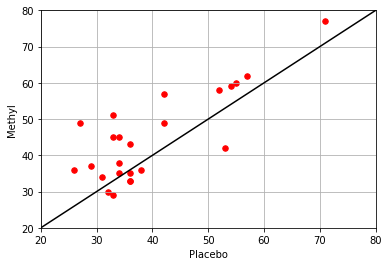

In [12]:
data.plot.scatter('Placebo', 'Methyl', c='r', s=30)
plt.grid()
plt.plot(range(100), c='black')
plt.xlim((20,80))
plt.ylim((20,80))
plt.show()

(array([4., 7., 2., 2., 3., 1., 4., 0., 0., 1.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <BarContainer object of 10 artists>)

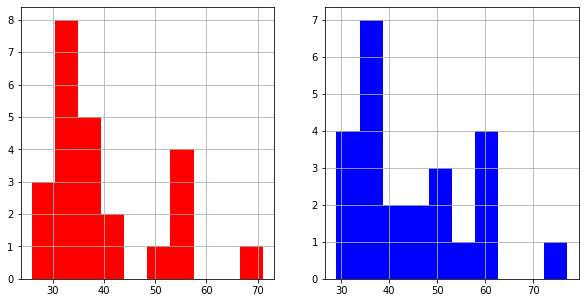

In [20]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.grid()
plt.hist(data.Placebo, color='r')
plt.subplot(1,2,2)
plt.grid()
plt.hist(data.Methyl, color='b')

##  Одновыборочный критерий Стьюдента

In [21]:
#   Проверим что среднее не равно 50
scipy.stats.ttest_1samp(data.Placebo, 50.0)

Ttest_1sampResult(statistic=-4.438003341905128, pvalue=0.00018894293251080175)

In [22]:
zconfint(data.Placebo)

(35.223272709859756, 44.276727290140244)

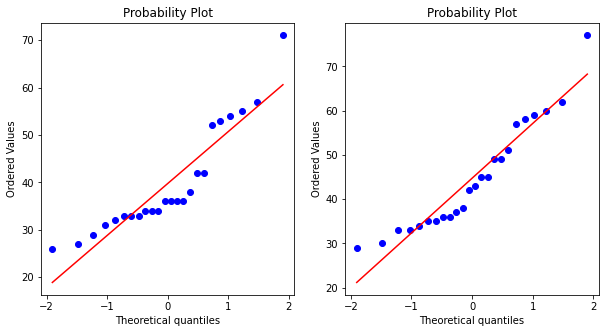

In [30]:
#   Двухвыборочный критерий Стьюдента

#   Q-Q plot
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
stats.probplot(data.Placebo, dist='norm', plot=pylab)
plt.subplot(1,2,2)
stats.probplot(data.Methyl, dist='norm', plot=pylab)
plt.show()

In [31]:
print(stats.shapiro(data.Placebo))
print(stats.shapiro(data.Methyl))
#   Данные распределены не нормально

ShapiroResult(statistic=0.8574873208999634, pvalue=0.00302018690854311)
ShapiroResult(statistic=0.9164453148841858, pvalue=0.04876822605729103)


In [32]:
stats.ttest_ind(data.Placebo, data.Methyl, equal_var=False)

Ttest_indResult(statistic=-1.4521635018159091, pvalue=0.1532919977404709)

In [36]:
cm = CompareMeans(DescrStatsW(data.Methyl), DescrStatsW(data.Placebo))
print(cm.tconfint_diff(alpha=.05))

(-1.914589250238282, 11.831255916904954)


In [ ]:
#   Выборки связанные поэтому нужно использовать двухвыборочный критерий Стьюдента

((array([-1.90380091, -1.48287381, -1.22601535, -1.03156092, -0.8698858 ,
         -0.7282709 , -0.59996024, -0.48085763, -0.36822879, -0.26009875,
         -0.154935  , -0.05146182,  0.05146182,  0.154935  ,  0.26009875,
          0.36822879,  0.48085763,  0.59996024,  0.7282709 ,  0.8698858 ,
          1.03156092,  1.22601535,  1.48287381,  1.90380091]),
  array([-22, -18, -15, -12, -11, -10,  -8,  -7,  -7,  -6,  -6,  -5,  -5,
          -5,  -4,  -3,  -1,   1,   2,   2,   3,   3,   4,  11])),
 (7.785252127777667, -4.958333333333334, 0.986792312046937))

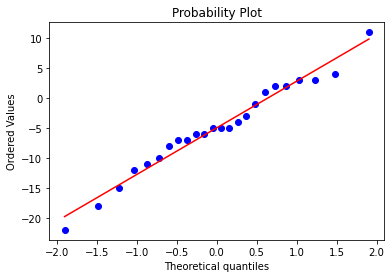

In [37]:
stats.probplot(data.Placebo - data.Methyl, dist="norm", plot=pylab)

In [38]:
print(stats.shapiro(data.Placebo - data.Methyl))

ShapiroResult(statistic=0.9798052906990051, pvalue=0.8922504186630249)


In [39]:
stats.ttest_rel(data.Methyl, data.Placebo)

Ttest_relResult(statistic=3.2223624451230406, pvalue=0.003771488176381471)

In [41]:
print(DescrStatsW(data.Methyl - data.Placebo).tconfint_mean())

(1.7752357893192365, 8.14143087734743)
